In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import timeit

In [5]:
loans_df = pd.read_csv('loans_full_schema.csv')
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
#Question 1

# Machine learning is a type of artificial intelligence where existing data is used to develop predictive models. It focuses on creating
# algorithms that enable the machine to predict models. Machine learning can be useful in many cases but not all. It is good to use machine 
# learning when working with large datasets because it can handle them more efficiently. It can be very difficult for humans to find patterns
# and behaviors within large datasets. Machine learning can also be used with complex patterns like image recognition. Machine learning can 
# be used to capture non-linear relationships like neural networks because it will enable a more accurate predictive model. It can be used 
# when creating personalized experiences. For example, when creating an application, machine learning allows for personalized experiences by
# analyzing user behavior. However, machine learning should not be used in cases where there is poor-quality data. Machine learning requires
# for there to be sufficient, high-quality data in order to create predictive models. Machine learning should not be used in cases where bias
# may be prevalent. This may cause issues in cases like hiring employees because a machine cannot take important human-like factors into 
# account. Lastly, machine learning should not be used in complex fields like medicine because the machine may lack interpretability. 
# Ultimately, machine learning can be very useful in complex, data-heavy models since that is what it requires to succeed. Yet in cases 
# involving legal considerations, bias, fairness, etc, machine learning is not the best model to use because it cannot add that human aspect. 



In [14]:
# Question 2

# One hot-encoding is used to see the correlation between homeownership and other factors. 
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
loans_df['homeownership type'] = class_labels.fit_transform(loans_df['homeownership type'].values)
loans_df.head()
loans_df= pd.get_dummies(loans_df, columns = ['homeownership type'])
loans_df.head()

,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,homeownership type_0,homeownership type_1,homeownership type_2
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,NaN,NaN,NaN,0,...,1999.33,984.14,1015.19,0.0,True,False,False,True,False,False
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,...,499.12,348.63,150.49,0.0,False,False,True,False,False,True
2,assembly,3.0,WI,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,...,281.80,175.37,106.43,0.0,False,False,True,False,False,True
3,customer service,1.0,PA,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,...,3312.89,2746.74,566.15,0.0,False,False,True,False,False,True
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,2324.65,1569.85,754.80,0.0,False,False,True,False,False,True


In [10]:
# getting rid of null values in loan amounts
def eliminating_null_values(column):
    lonas_df = loans_df.dropna(subset=[column])
eliminating_null_values('loan_amount')

In [11]:
# Standarized all the data to floats 
def standardizing(column):
    loans_df[column].astype('float')
standardizing('debt_to_income')
loans_df.head(30)

,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership type,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,NaN,NaN,NaN,0,...,Cash,27015.86,1999.330000,984.14,1015.19,0.0,0,True,False,False
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,...,Cash,4651.37,499.120000,348.63,150.49,0.0,2,False,False,True
2,assembly,3.0,WI,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,...,Cash,1824.63,281.800000,175.37,106.43,0.0,2,False,False,True
3,customer service,1.0,PA,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,...,Cash,18853.26,3312.890000,2746.74,566.15,0.0,2,False,False,True
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,Cash,21430.15,2324.650000,1569.85,754.80,0.0,2,False,False,True
5,NaN,NaN,KY,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,...,Cash,4256.71,873.130000,743.29,129.84,0.0,1,False,True,False
6,hr,10.0,MI,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,...,Cash,22560.00,2730.510000,1440.00,1290.51,0.0,0,True,False,False
7,police,10.0,AZ,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,...,Cash,19005.39,1765.840000,994.61,771.23,0.0,0,True,False,False
8,parts,10.0,NV,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,...,Cash,18156.66,2703.220000,1843.34,859.88,0.0,0,True,False,False
9,4th person,3.0,IL,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,...,Cash,6077.13,391.150000,322.87,68.28,0.0,2,False,False,True


<Axes: >

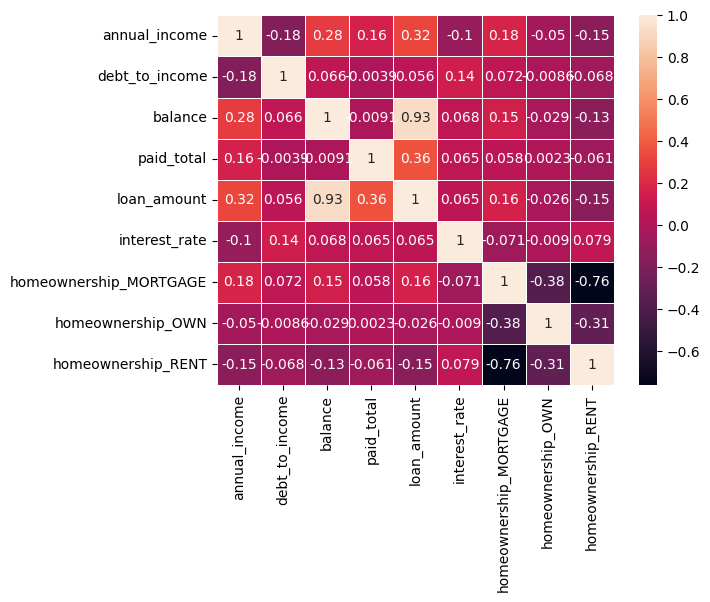

In [17]:
# Question 3

# heatmap shows the correlation with the higher the income the higher the loan amount
Correlation = loans_df[['annual_income','debt_to_income','balance','paid_total','loan_amount','interest_rate',
                        'homeownership_MORTGAGE','homeownership_OWN','homeownership_RENT']].corr()
                        
sns.heatmap(Correlation, annot=True,linewidths=0.5)

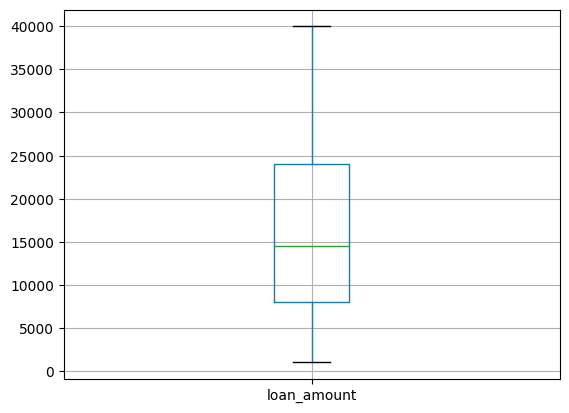

In [18]:
# Question 4

# median loan > 15000
# maxiumum loan = 40000
# minimum loan = 10000
# first quartile = 7000
# 3rd quartile = 240000
def boxplot(column):
    loans_df.boxplot(column=[column], )
boxplot('loan_amount')

In [34]:
# Question 5

import timeit
import pandas as pd

loans_df['state']
starttime1 = timeit.default_timer()
def regions(state):
    Northeast = ['ME','NH','CT','MA','VT','NY','DE','NJ','MD','PA','DC','RI']
    Pacific = ['WA','OR','AK','CA','AZ','NV','UT','ID']
    Midwest = ['MN','MO','IL','OH','IN','WI','MI','IA']
    Plains = ['TX','OK','SD','ND','MT','WY','CO','NM','NE','KS']
    South = ['AR','LA','MS','AL','TN','KY','GA','FL','SC','NC','WV','VA']
    
    if state in Northeast:
        return 'Northeast'
    elif state in Pacific:
        return 'Pacific'
    elif state in Midwest:
        return 'Midwest'
    elif state in Plains:
        return 'Plains'
    elif state in South:
        return 'South'
    else:
        return 'other'

loans_df['Region'] = loans_df['state'].apply(lambda x: regions(x))
#loans_df.head(20)
endtime1 = timeit.default_timer()
time_for_approach1 = endtime1 - starttime1    
time_for_approach1    

0.015393749810755253

In [36]:
import timeit
import pandas as pd

regions_dict = {
    'Pacific': ['WA', 'OR', 'AK', 'CA', 'AZ', 'NV', 'UT', 'ID'],
    'Plains': ['TX', 'OK', 'SD', 'ND', 'MT', 'WY', 'CO', 'NM', 'NE', 'KS'],
    'Midwest': ['MN', 'MO', 'IL', 'OH', 'IN', 'WI', 'MI', 'IA'],
    'Northeast': ['ME', 'NH', 'CT', 'MA', 'VT', 'NY', 'DE', 'NJ', 'MD', 'PA', 'DC', 'RI'],
    'South': ['AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'GA', 'FL', 'SC', 'NC', 'WV', 'VA']}
starttime2 = timeit.default_timer()

def map_to_region(state):
    for region, states in regions_dict.items():
        if state in states:
            return region
    return 'Other'

loans_df['Region'] = loans_df['state'].apply(map_to_region)

endtime2 = timeit.default_timer()
time_for_approach2 = endtime2 - starttime2
print(time_for_approach1,   
      time_for_approach2)

if time_for_approach1>time_for_approach2:
    print("Using a dictionary mapping is more performant.")
elif time_for_approach1<time_for_approach2:
    print("Using lambda functions are more performant.")
else:
    print("Both approaches have similar performance.")
    

0.015393749810755253 0.01461795810610056
Using a dictionary mapping is more performant.


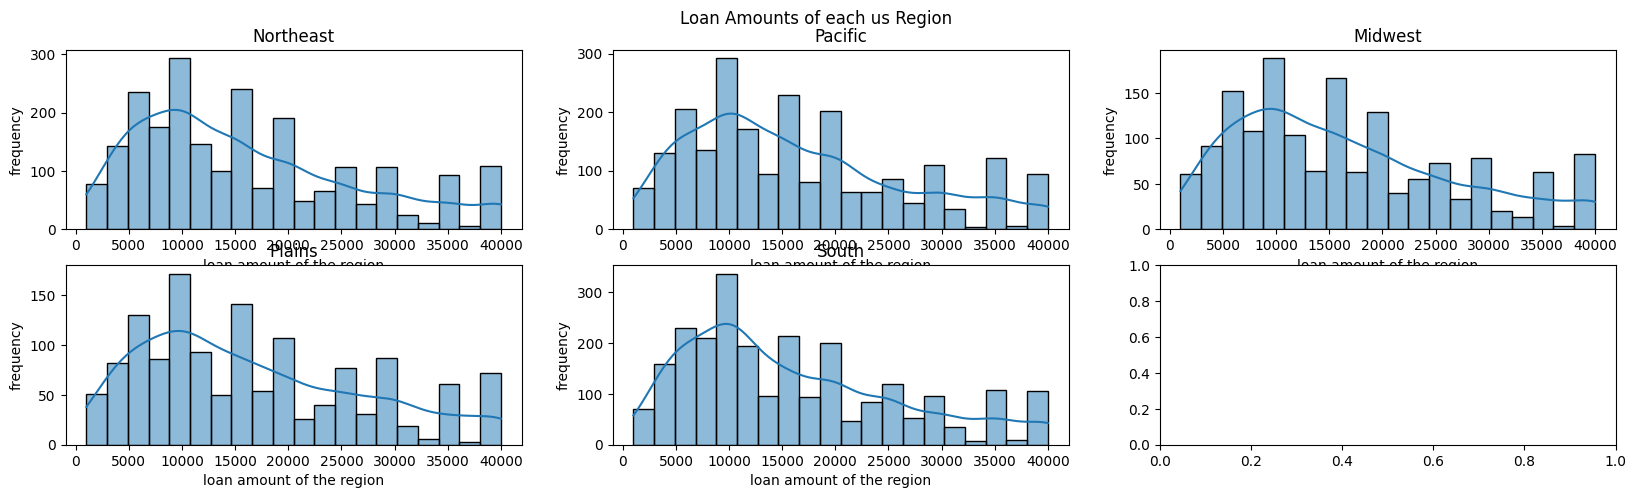

In [37]:
# Question 6

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))
fig.suptitle("Loan Amounts of each us Region", fontsize=12)
def plot_histogram():
    regions = ['Northeast','Pacific','Midwest','Plains','South']
    
    for i, region in enumerate(regions):
      rows, columns = divmod(i, 3)
      axis = axes[rows, columns]
      sns.histplot(loans_df[loans_df['Region'] == region]['loan_amount'], ax=axis, bins=20, kde=True)
      axis.set_title(region)
      axis.set_ylabel('frequency')
      axis.set_xlabel('loan amount of the region')
    plt.subplots_adjust(top=0.9)
    plt.show()  
plot_histogram()
